**Contoh Kasus untuk mengimplementasi Teori Graf, Teori Tree, dan Bahasa Automata dengan python**

**Teori Graf**

Contoh 1: Menemukan jalur tercepat jaringan sensor di hutan untuk memantau kebakaran menggunakan algoritma Dijkstra

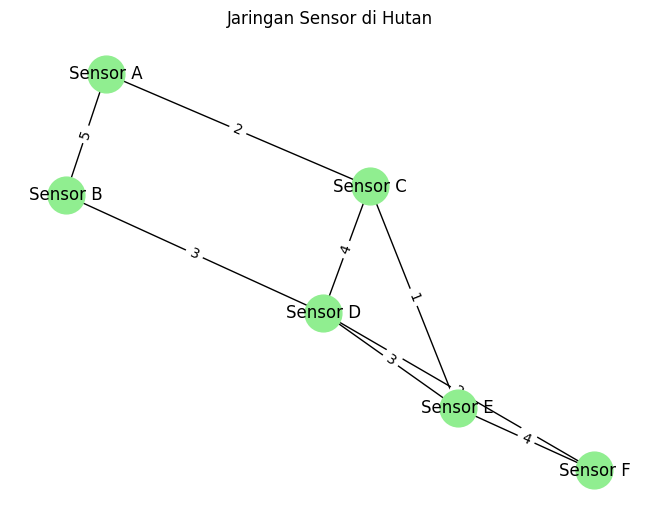

Jalur Tercepat dari Sensor A ke Sensor F: ['Sensor A', 'Sensor C', 'Sensor E', 'Sensor F']


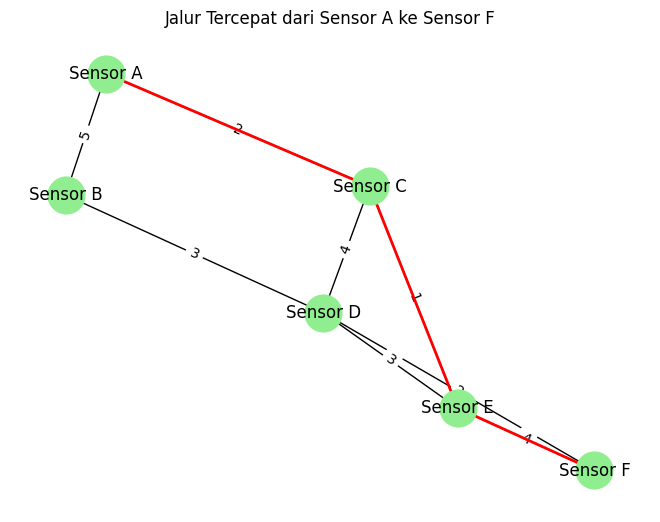

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graf kosong
G = nx.Graph()

# Tambahkan node (sensor)
sensors = ["Sensor A", "Sensor B", "Sensor C", "Sensor D", "Sensor E", "Sensor F"]
G.add_nodes_from(sensors)

# Tambahkan edge (komunikasi) dengan bobot (kekuatan sinyal)
connections = [
    ("Sensor A", "Sensor B", 5),
    ("Sensor A", "Sensor C", 2),
    ("Sensor B", "Sensor D", 3),
    ("Sensor C", "Sensor D", 4),
    ("Sensor C", "Sensor E", 1),
    ("Sensor D", "Sensor E", 3),
    ("Sensor D", "Sensor F", 2),
    ("Sensor E", "Sensor F", 4)
]
G.add_weighted_edges_from(connections)

# Gambarkan graf
pos = nx.spring_layout(G)  # Tentukan tata letak graf
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightgreen")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Jaringan Sensor di Hutan")
plt.show()

# Temukan jalur tercepat dari Sensor A ke Sensor F
shortest_path = nx.dijkstra_path(G, source="Sensor A", target="Sensor F")
print("Jalur Tercepat dari Sensor A ke Sensor F:", shortest_path)

# Visualisasikan jalur tercepat
path_edges = list(zip(shortest_path, shortest_path[1:]))

plt.figure()
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightgreen")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

plt.title("Jalur Tercepat dari Sensor A ke Sensor F")
plt.show()


***Contoh 2:***

Menentukan komponen terhubung dalam graf.

Komponen Terhubung: [{'C', 'A', 'B'}, {'F', 'E', 'D'}]


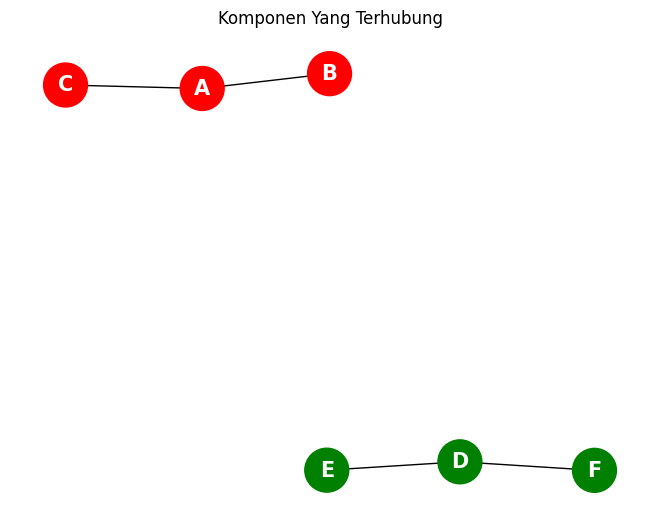

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graph menggunakan networkx
G = nx.Graph()

# Menambahkan tepi sesuai dengan struktur yang diberikan
edges = [('A', 'B'), ('A', 'C'), ('D', 'E'), ('D', 'F')]
G.add_edges_from(edges)

# Menemukan komponen terhubung
components = list(nx.connected_components(G))
print("Komponen Terhubung:", components)

# Menentukan warna untuk setiap komponen terhubung
color_map = ['red', 'green', 'blue', 'yellow', 'cyan', 'magenta']
node_colors = {}
for i, component in enumerate(components):
    for node in component:
        node_colors[node] = color_map[i % len(color_map)]

# Menggambar graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, 
        node_color=[node_colors[node] for node in G.nodes()],
        font_size=15, font_color="white", font_weight="bold")

# Menampilkan graph
plt.title("Komponen Yang Terhubung")
plt.show()


**Teori Tree**

Contoh 1:

***Traversal Preorder pada Binary Tree***

Diberikan sebuah binary tree sebagai berikut, lakukan traversal preorder.

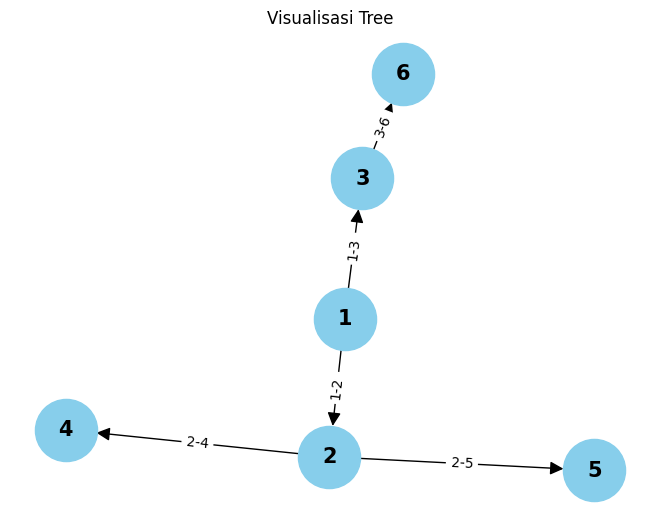

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graph kosong
G = nx.DiGraph()

# Menambahkan simpul dan tepi sesuai dengan tree yang diberikan
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6)]
G.add_edges_from(edges)

# Menggambar graph
pos = nx.spring_layout(G)  # Penentuan layout untuk penempatan node
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=15, font_color="black", font_weight="bold", arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{u}-{v}' for u, v in edges})

# Menampilkan graph
plt.title("Visualisasi Tree")
plt.show()


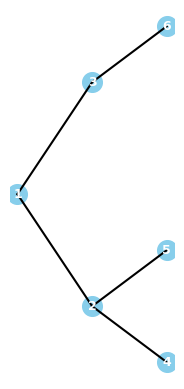

In [4]:
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def plot_tree(node, pos=None, level=0, positions=None, parent=None):
    if pos is None:
        pos = {node: (0, 0)}
    if positions is None:
        positions = {}
        
    positions[node] = (level, pos[node][1])
    
    if node.left:
        pos[node.left] = (level + 1, pos[node][1] - 1.5 / (level + 1))
        plot_tree(node.left, pos, level + 1, positions, node)
    if node.right:
        pos[node.right] = (level + 1, pos[node][1] + 1.5 / (level + 1))
        plot_tree(node.right, pos, level + 1, positions, node)
    
    return positions

def draw_tree(root):
    positions = plot_tree(root)
    fig, ax = plt.subplots()
    
    for node, (x, y) in positions.items():
        ax.scatter(x, y, s=200, c='skyblue')
        ax.text(x, y, str(node.value), ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        if node.left:
            lx, ly = positions[node.left]
            ax.plot([x, lx], [y, ly], 'k-')
        if node.right:
            rx, ry = positions[node.right]
            ax.plot([x, rx], [y, ry], 'k-')
    
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

# Membangun binary tree
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.right = TreeNode(6)

# Visualisasi binary tree
draw_tree(root)


**Bahasa Automata**

Contoh 1: Pengenalan Bilangan Biner yang Habis Dibagi 3 dengan Nondeterministic Finite Automaton (NFA)

In [5]:
class NFA:
    def __init__(self):
        self.transition_table = {
            0: {'0': {0}, '1': {1}},
            1: {'0': {2}, '1': {0}},
            2: {'0': {1}, '1': {2}},
        }
        self.start_state = 0
        self.accept_states = {0}

    def is_accepted(self, input_string):
        current_states = {self.start_state}
        for char in input_string:
            next_states = set()
            for state in current_states:
                if char in self.transition_table[state]:
                    next_states.update(self.transition_table[state][char])
            current_states = next_states
        return any(state in self.accept_states for state in current_states)

nfa = NFA()
test_string = "110"
print(nfa.is_accepted(test_string))  # Output: True


True


***Contoh 2: Sistem Validasi Format Nomor Telepon***

In [6]:
class PhoneNumberDFA:
    def __init__(self):
        self.transition_table = {
            0: {'+': 1},
            1: {'6': 2},
            2: {'2': 3},
            3: {'-': 4},
            4: {str(i): 5 for i in range(10)},  # {0-9}
            5: {str(i): 6 for i in range(10)},  # {0-9}
            6: {str(i): 7 for i in range(10)},  # {0-9}
            7: {'-': 8},
            8: {str(i): 9 for i in range(10)},  # {0-9}
            9: {str(i): 10 for i in range(10)}, # {0-9}
            10: {str(i): 11 for i in range(10)}, # {0-9}
            11: {'-': 12},
            12: {str(i): 13 for i in range(10)}, # {0-9}
            13: {str(i): 14 for i in range(10)}, # {0-9}
            14: {str(i): 15 for i in range(10)}, # {0-9}
            15: {str(i): 16 for i in range(10)}, # {0-9}
            16: {str(i): 17 for i in range(10)}, # {0-9}
            17: {str(i): 18 for i in range(10)}, # {0-9}
        }
        self.start_state = 0
        self.accept_states = {18}

    def is_accepted(self, input_string):
        current_state = self.start_state
        for char in input_string:
            if char in self.transition_table[current_state]:
                current_state = self.transition_table[current_state][char]
            else:
                return False
        return current_state in self.accept_states

phone_dfa = PhoneNumberDFA()
test_string = "+6281226181743"
print(phone_dfa.is_accepted(test_string))


False
